* training->fit
* algorithmns->*model*



In [ ]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [ ]:
t=[[5],[7],[12],[16],[20]]   #time is independent and it is in 2-D array
m=[40,120,180,210,240]        #mass is independent and it is in 1-D array
LR.fit(t,m)

LinearRegression()

In [ ]:
LR.predict([[5.5]])

array([78.64935065])

LOGISTIC REGRESSION

In [ ]:
from logging import LogRecord
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

In [ ]:
# Distance and corresponding probability data
distances = np.array([1,2,5,10,15,20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30,35,40,41,47,50]).reshape(-1, 1)
probabilities = np.array([1,1,1,1,1,1,0.9, 0.85, 0.73, 0.67, 0.5, 0.47, 0.39, 0.31, 0.25, 0.15,0,0,0,0,0])
# convert probabilities to binary lables
threshold=0.5
binary_lables=(probabilities>threshold).astype(int)
#create and fit logistic regression model
logr=LogisticRegression()
logr.fit(distances,binary_lables)

LogisticRegression()

In [ ]:
p=logr.predict([[25]])  #distance
print(p)

[0]


In [ ]:
if p==[1]:
  print("Goal")
else:
  print("No Goal")

No Goal


In [ ]:
#predict 100 distances between 1 and 50
#generate distances for prediction
dist=np.linspace(1,50,100).reshape(-1,1)
print(dist)  #distances

 #make prediction using the model
prob=logr.predict_proba(dist)[:,1]   #prediction
print(prob)

[[ 1.        ]
 [ 1.49494949]
 [ 1.98989899]
 [ 2.48484848]
 [ 2.97979798]
 [ 3.47474747]
 [ 3.96969697]
 [ 4.46464646]
 [ 4.95959596]
 [ 5.45454545]
 [ 5.94949495]
 [ 6.44444444]
 [ 6.93939394]
 [ 7.43434343]
 [ 7.92929293]
 [ 8.42424242]
 [ 8.91919192]
 [ 9.41414141]
 [ 9.90909091]
 [10.4040404 ]
 [10.8989899 ]
 [11.39393939]
 [11.88888889]
 [12.38383838]
 [12.87878788]
 [13.37373737]
 [13.86868687]
 [14.36363636]
 [14.85858586]
 [15.35353535]
 [15.84848485]
 [16.34343434]
 [16.83838384]
 [17.33333333]
 [17.82828283]
 [18.32323232]
 [18.81818182]
 [19.31313131]
 [19.80808081]
 [20.3030303 ]
 [20.7979798 ]
 [21.29292929]
 [21.78787879]
 [22.28282828]
 [22.77777778]
 [23.27272727]
 [23.76767677]
 [24.26262626]
 [24.75757576]
 [25.25252525]
 [25.74747475]
 [26.24242424]
 [26.73737374]
 [27.23232323]
 [27.72727273]
 [28.22222222]
 [28.71717172]
 [29.21212121]
 [29.70707071]
 [30.2020202 ]
 [30.6969697 ]
 [31.19191919]
 [31.68686869]
 [32.18181818]
 [32.67676768]
 [33.17171717]
 [33.66666

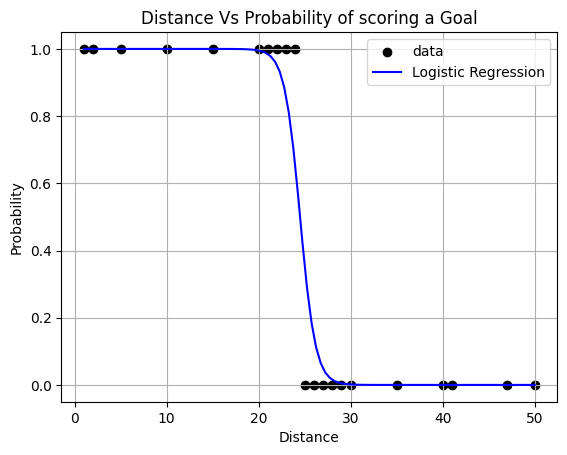

In [ ]:
#plotting actual data-train
plt.scatter(distances,binary_lables,color='black',label='data')
#plotting test data with predictions-valid/test
plt.plot(dist,prob,color='blue',label='Logistic Regression')
plt.title('Distance Vs Probability of scoring a Goal')
plt.xlabel('Distance')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

Decision Trees
*   Decision trees in machine learning provide an effective method for decision because they lay out the problem and all possible outcomes
*   Have nodes and leaves
*   Node: Condition having True and False Branches
*   Leaf:Result-Showing the dataset that is True and False to the condition
*   Decision tree continuosly split the data until it gets the pure leaves.





Case Study:
>Taking a dataset of 26 states with features like Literacy,Cleanliness,Crime Rate and targeting (predicating)Good or Bad state!
>Good is called Target variable here,it has values of 0s and 1s

BUILDING DECISION TREE
Node-1:CR>60
        True=[C,Q,X=0](pure leaf)
        False=[A,E,F,G,I,K,L,N,P,R,U,V=0][B,D,H,J,M,O,S,T,W,Y,Z=1](mixed leaf)
        Mixed leaf have target variavble as both 0's and 1's.Hence this data is split once again.
Node-2:CR>50
       True=[A,E,F,G,I,K,L,N,P,R,U,V=0](pure leaf)
       False=[B,D,H,J,M,O,S,T,W,Y,Z=1](pure leaf)
results:
         Node              Good
        CR>60               0
        CR<60               can't be determined
        CR<50               1
predict: i)CR=63 ,Good =0
         ii)CR=45,good=1

In [ ]:
import pandas as pd

In [ ]:
dft=pd.read_csv("/content/demodt.txt",sep=",")
dft

,State,Literacy,Cleanliness,Crime_Rate,Good
0,A,92,90,54,0
1,B,56,67,50,1
2,C,78,85,62,0
3,D,63,72,48,1
4,E,85,79,55,0
5,F,71,68,58,0
6,G,80,83,51,0
7,H,67,74,47,1
8,I,89,88,53,0
9,J,58,65,49,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt=DecisionTreeClassifier()
target=dft.Good

In [ ]:
feature_list=['Literacy','Cleanliness','Crime_Rate']
feature=dft[feature_list]

In [ ]:
dt.fit(feature,target)

DecisionTreeClassifier()

In [ ]:
pred=dt.predict([[90,90,45]])
print(pred)

[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
if pred==1:
   print("good")
else:
   print("Not Good")

good


In [ ]:
import numpy as np
a=int(input("enter the literacy rate"))
b=int(input("enter the cleanliness value"))
c=int(input("enter the crime rate"))
d= np.array([a,b,c]).reshape(-1, 1)
e=dt.predict([[a,b,c]])
if e==1:
   print("good")
else:
   print("Not Good")


enter the literacy rate90
enter the cleanliness value90
enter the crime rate45
good


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


RANDOM FOREST
>collection of many decision trees!
>Keywords:Bootstrapping,Aggregation.
Case Study:
   Y is the target
   features is x0,x1,x2,x3,x4
  BOOTSTRAPPING:
  Splitting the parent dataset into child datasets(having same no.of rows,should have different row combination)
   
